<a href="https://colab.research.google.com/github/phan-le-phu/CS114.K21/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [0]:
# Load dataset
url = "https://cs.uit.edu.vn/data.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

# add  new features (n^2, log2n)
sizes_square = []
log_2_sizes = []
for index, row in dataset.iterrows():
  sizes_square.append(row["sizes"] ** 2)
  log_2_sizes.append(math.log2(row["sizes"]))
dataset["sizes_square"] = sizes_square
dataset["log_2_sizes"] = log_2_sizes

In [158]:
# shape
print(dataset.shape)

(5211, 4)


In [159]:
# head
print(dataset.head(20))

      sizes     times  sizes_square  log_2_sizes
0   4032139  1.200580  1.625814e+13    21.943114
1   2055486  0.509774  4.225023e+12    20.971048
2   5626651  1.476080  3.165920e+13    22.423845
3     42065  0.007651  1.769464e+09    15.360333
4   6297788  1.661560  3.966213e+13    22.586414
5   8871407  2.653120  7.870186e+13    23.080732
6   3106899  0.801168  9.652821e+12    21.567044
7   2410855  0.598170  5.812222e+12    21.201113
8    558704  0.129056  3.121502e+11    19.091725
9   9012730  2.477870  8.122930e+13    23.103533
10  6099403  1.631770  3.720272e+13    22.540237
11  7189925  1.940180  5.169502e+13    22.777545
12  3759151  0.978011  1.413122e+13    21.841975
13  8004274  2.202210  6.406840e+13    22.932339
14  4125525  1.059360  1.701996e+13    21.976146
15  7580493  2.084130  5.746387e+13    22.853860
16  9045670  2.461290  8.182415e+13    23.108796
17  2987773  0.768997  8.926787e+12    21.510639
18  2956967  0.780160  8.743654e+12    21.495687
19  1941281  0.47722

In [160]:
# descriptions
print(dataset.describe())

              sizes        times  sizes_square  log_2_sizes
count  5.211000e+03  5211.000000  5.211000e+03  5211.000000
mean   4.991583e+06     1.363322  3.334470e+13    21.801786
std    2.903517e+06     0.825849  2.997776e+13     1.459945
min    2.390000e+02     0.000028  5.712100e+04     7.900867
25%    2.451362e+06     0.630964  6.009176e+12    21.225152
50%    5.032102e+06     1.355770  2.532205e+13    22.262730
75%    7.523041e+06     2.076820  5.659615e+13    22.842885
max    9.995358e+06     3.315540  9.990718e+13    23.252827


In [161]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sizes         5211 non-null   int64  
 1   times         5211 non-null   float64
 2   sizes_square  5211 non-null   float64
 3   log_2_sizes   5211 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 163.0 KB
None


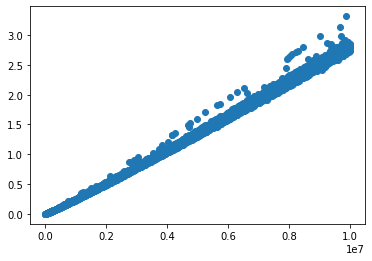

In [162]:
plt.scatter(dataset["sizes"],dataset["times"])
plt.show()


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.loc[:, ['sizes', 'sizes_square', 'log_2_sizes']], dataset["times"], test_size = 0.2)
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

In [0]:
my_model =  linear_model.LinearRegression()

# train model thứ 1 với 1 feature la sizes

In [165]:
my_model.fit(X_train["sizes"].values.reshape(-1, 1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_pred = my_model.predict(X_test["sizes"].values.reshape(-1, 1))

In [167]:
# The coefficients
print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: 
 [[2.83864242e-07]]
Mean squared error: 0.00168247332771743184
Coefficient of determination: 1.00


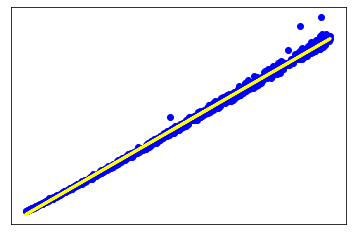

In [168]:
plt.scatter(X_test["sizes"], Y_test,  color='blue')
plt.plot(X_test["sizes"], Y_pred, color='yellow', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Train model thứ hai với hai features là sizes và sizes_square

In [169]:

my_2_model =  linear_model.LinearRegression()

my_2_model.fit(X_train.loc[:, ['sizes', 'sizes_square']], Y_train)
Y_pred = my_2_model.predict(X_test.loc[:, ['sizes', 'sizes_square']])
# The coefficients
# print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


Mean squared error: 0.00140064872520781307
Coefficient of determination: 1.00


# Train model thứ ba với ba features là sizes, sizes_square và log_2_sizes

In [170]:
my_3_model =  linear_model.LinearRegression()

my_3_model.fit(X_train, Y_train)
Y_pred = my_3_model.predict(X_test)
# The coefficients
# print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.20f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


Mean squared error: 0.00139039052407094227
Coefficient of determination: 1.00


# Sử dụng thử 3 model trên

In [172]:
print("Nhap kich thuoc : ")
sizes = int(input())
sizes_square = sizes ** 2
log_2_sizes = math.log2(sizes)
print("Kêt quả của model thứ 1: %.20f" % my_model.predict(np.array([sizes]).reshape(1, -1)))
print("Kêt quả của model thứ 2: %.20f" % my_2_model.predict(np.array([sizes, sizes_square]).reshape(1, -1)))
print("Kêt quả của model thứ 3: %.20f" % my_3_model.predict(np.array([sizes, sizes_square, log_2_sizes]).reshape(1, -1)) )

Nhap kich thuoc : 
12
Kêt quả của model thứ 1: -0.05356315159612463211
Kêt quả của model thứ 2: -0.02142900336065883468
Kêt quả của model thứ 3: 0.08315766217317724363
